In [102]:
import pandas as pd
import matplotlib
import pylab as pl
from sklearn.cluster import KMeans
from sklearn import preprocessing
pd.options.mode.chained_assignment = None

In [103]:
df = pd.read_csv('winequality-red.csv')

1. Пусть дегустаторы помимо общей оценки качества вина ставят еще и оценку на основе качества и алкогольности, назовём её "rate", вычислять её будем как (alcohol/2 + quality)/2

In [104]:
rate = []
for i in range(1599):
    rate.append((df["alcohol"][i]/2 + df["quality"][i])/2)
df["rate"] = rate
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  rate  
0      9.4        5  4.85  
1      9.8        5  4.95  
2      9.8        5  4.95  
3      9.8        6  5.45  
4      9.4        5  4.85

2. Удаление выбросов (аналогично нахождению выбросов из лр1 через межквартильный размах)

In [105]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

df_clean.shape


(1179, 13)

Осталось 1179 строк из 1599.

In [106]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
 12  rate                  1179 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 129.0 KB


Очевидно, что пропущенные и "пустые" значения отсутствуют.

In [107]:
df_clean.drop_duplicates()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   rate  
0         9.4        5  4.850  
1         9.8        5  4.950  
2         9.8        5  4.950  
3         9.8        6  5.450  
5         9.4        5  4.850  
...       ...      ...    ...  
1593      9.5        6  5.375  
1594     10.5        5  5.125  
1595     11.2        6  5.800  
1597     10.2        5  5.050  
1598     11.0        6  5.750  

[994 rows x 13 columns]

Функция drop_dublicates() удалила все дубликаты, кроме первого их вхождения, в датафрейме осталось 994 строки. Данные можно считать очищенными.

3. Построить графики зависимостей одной переменной от другой.

In [108]:
pd.plotting.scatter_matrix(df_clean, figsize=(150, 150))

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>,
        <Axes: xlabel='rate', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity

Очевидна кластеризация по оценке качества (вино с качеством 4, 5, 6 и 7)

In [109]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_clean)
minmax_processed.shape


(1179, 13)

In [110]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_clean.index, columns=df_clean.columns)

In [111]:
df_numeric_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.319444          0.655367     0.000000        0.291667   0.448718   
1       0.375000          0.858757     0.000000        0.583333   0.730769   
2       0.375000          0.723164     0.054795        0.458333   0.653846   
3       0.847222          0.180791     0.767123        0.291667   0.435897   
4       0.319444          0.655367     0.000000        0.291667   0.448718   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.243902              0.241379  0.629630  0.770270   0.353846   
1             0.585366              0.525862  0.513889  0.351351   0.538462   
2             0.341463              0.413793  0.537037  0.432432   0.492308   
3             0.390244              0.465517  0.652778  0.297297   0.384615   
4             0.243902              0.241379  0.629630  0.770270   0.353846   

    alcohol   quality      rate  
0  0.148936  0.333333  0.230769  
1  0.234043  0.333333  0.269231  
2  0.234043  0.333333  0.269231  
3  0.234043  0.666667  0.461538  
4  0.148936  0.333333  0.230769

Теперь данные нормализованы

Используем Elbow Curve для определения количества кластеров.

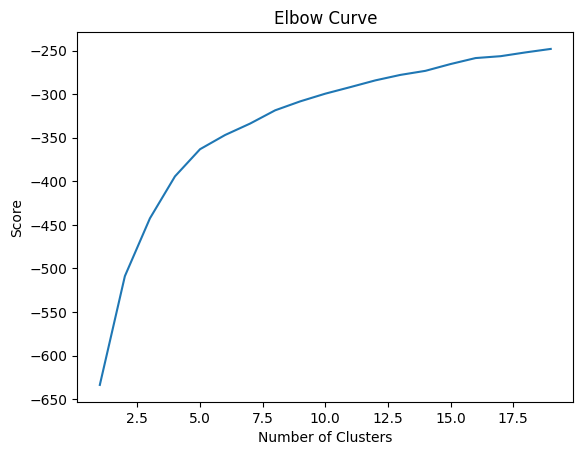

In [112]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


Судя по изгибу кривой, число кластеров кластеров равно 6 или 7 (после этих значений кривая начинает вести себя как прямая). Возьмем число кластеров, равное 7.

Проводим кластеризацию и добавляем столбец с номером кластера в датафрейм с очищенными данными. 

In [113]:
kmeans = KMeans(n_clusters=7, n_init=10)
kmeans.fit(df_numeric_scaled)
df_clean['cluster'] = kmeans.labels_
df_clean.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  rate  cluster  
0      9.4        5  4.85        0  
1      9.8        5  4.95        1  
2      9.8        5  4.95        0  
3      9.8        6  5.45        5  
4      9.4        5  4.85        0